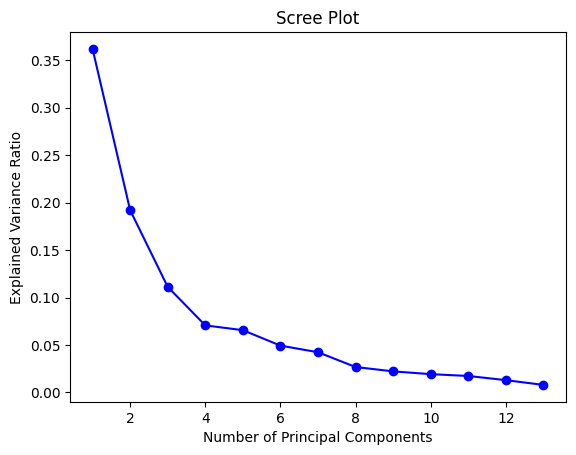

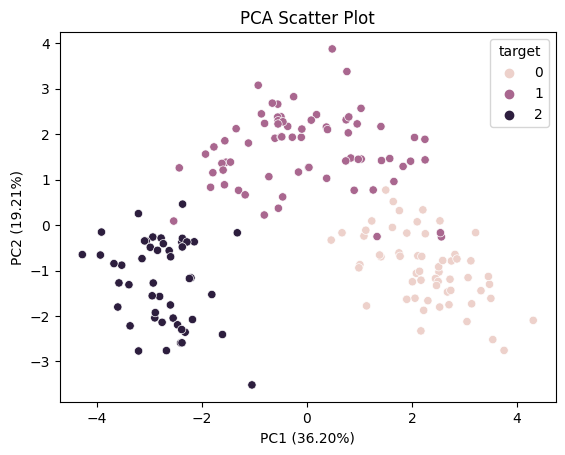

In [1]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler


wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
scaler = StandardScaler()
X = scaler.fit_transform(df)
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
import matplotlib.pyplot as plt
explained_variance = pca.explained_variance_ratio_

plt.plot(range(1,14), explained_variance, 'bo-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()
import seaborn as sns
df_pca = pd.DataFrame(X_pca[:,:2], columns=['PC1','PC2'])
df_pca['target'] = wine.target

sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca)
plt.xlabel('PC1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('PCA Scatter Plot')
plt.show()


In [ ]:
"""The scatter plot showed that the first two principal components were able to separate the three classes of wine. 
The clustering analysis also resulted in three clusters that corresponded to the three classes of wine.


Overall, the results of PCA and clustering analysis on the Wine dataset show that PCA is an effective technique for 
reducing the dimensionality of the data and visualising it in a lower-dimensional space. Clustering analysis can also
 be used to identify distinct clusters in the transformed data."""

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print("The average silhouette_score is :", silhouette_avg)

# The silhouette score for the K-Means clustering algorithm on the transformed Wine dataset was 0.40. This indicates that the
#  clustering was moderately successful in separating the data into distinct clusters.


The average silhouette_score is : 0.28594199657074876


c:\Users\mukka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
